# 2. 자연어와 단어의 분산표현

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## 2.3.1 파이썬으로 말뭉치 전처리하기

In [3]:
# 말뭉치 예시 문장
text = 'You say goodby and I say hello.'

In [4]:
# text를 단어 단위로 분할하기
text = text.lower()
text = text.replace('.', ' .')
print(text)

words = text.split(' ')
print(words)

you say goodby and i say hello .
['you', 'say', 'goodby', 'and', 'i', 'say', 'hello', '.']


In [5]:
# dic으로 단어에 ID를 부여하기
word_to_id = {}
id_to_word = {}

for word in words :
    if word not in word_to_id :
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(id_to_word)
print("---------------------------------------------------------------------------")
print(word_to_id)
print("---------------------------------------------------------------------------")
print(id_to_word[1])
print(word_to_id['hello'])

{0: 'you', 1: 'say', 2: 'goodby', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
---------------------------------------------------------------------------
{'you': 0, 'say': 1, 'goodby': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
---------------------------------------------------------------------------
say
5


In [6]:
# 단어목록에서  단어 ID목록으로 변경
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [7]:
# 말뭉치 전처리 함수 구현
def preprocess(text) :
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words :
        if word not in word_to_id :
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    #단어 ID목록
    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [8]:
# 전처리 예시
text = "The record shows I took the blows."
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus, word_to_id, id_to_word, sep = "\n")

[0 1 2 3 4 0 5 6]
{'the': 0, 'record': 1, 'shows': 2, 'i': 3, 'took': 4, 'blows': 5, '.': 6}
{0: 'the', 1: 'record', 2: 'shows', 3: 'i', 4: 'took', 5: 'blows', 6: '.'}


## 2.3.4 동시발생 행렬

In [9]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [10]:
# 동시발생행렬
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0]
])

In [11]:
# 단어 벡터 표현하기
for i in range(len(C)) :
    print(f"ID가 {i}인 단어 벡터: {C[i]}")
print()

# "goodbye"의 벡터 표현
print("\'goodbye\'의 단어벡터: ",C[word_to_id['goodbye']])

ID가 0인 단어 벡터: [0 1 0 0 0 0 0]
ID가 1인 단어 벡터: [1 0 1 0 1 1 0]
ID가 2인 단어 벡터: [0 1 0 1 0 0 0]
ID가 3인 단어 벡터: [0 0 1 0 1 0 0]
ID가 4인 단어 벡터: [0 1 0 1 0 0 0]
ID가 5인 단어 벡터: [0 1 0 0 0 0 1]
ID가 6인 단어 벡터: [0 0 0 0 0 1 0]

'goodbye'의 단어벡터:  [0 1 0 1 0 0 0]


In [12]:
# 동시발생행렬 함수
def create_co_matrix(corpus, vocab_size, window_size=1) :
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)

    for idx, word_id in enumerate(corpus) :
        for i in range(1, window_size + 1) :
            left_idx = idx - i
            right_idx = idx + i

            if (left_idx >= 0) :
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if (right_idx < corpus_size) :
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix 


## 2.3.5 벡터 간 유사도

In [13]:
# 코사인 유사도 구현
def cos_similarity(x, y, eps=1e-8) :
    nx = x / np.sqrt(np.sum(x**2) + eps)
    ny = y / np.sqrt(np.sum(y**2) + eps)
    return np.dot(nx, ny)

In [14]:
# you와 I의 유사도 구하는 코드 예시

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # 'you'의 벡터
c1 = C[word_to_id['i']]   #'i'의 벡터

print(f"c0: {c0} \nc1: {c1}")
print(cos_similarity(c0, c1))

c0: [0 1 0 0 0 0 0] 
c1: [0 1 0 1 0 0 0]
0.7071067758832467


## 2.3.6 유사 단어의 랭킹 표시

In [15]:
# 유사 단어 랭킹 표시 함수 구현
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5) :
    # 1. 검색어를 꺼낸다.
    if query not in word_to_id :
        print(f"{query}(을)를 찾을 수 없습니다.")
        return

    print("\n[query] " + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 2. 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity =np.zeros(vocab_size)
    for i in range(vocab_size) :
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort() :
        if id_to_word[i] == query :
            continue
        print(f"{id_to_word[i]}: {similarity[i]}")

        count += 1
        if (count >= top) :
            return 

In [16]:
aa = np.array([100, -20, 2])
aa.argsort()

array([1, 2, 0], dtype=int64)

In [17]:
(-aa).argsort()

array([0, 2, 1], dtype=int64)

In [18]:
# 유사 단어 랭킹 표시 예시
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar("you", word_to_id, id_to_word, C)


[query] you
goodbye: 0.7071067758832467
i: 0.7071067758832467
hello: 0.7071067758832467
say: 0.0
and: 0.0


## 2.4.1 상호정보량 

#### 단어의 단독 표현 횟수도 고려하여 분산 표현하여 "상호 정보량"을 계량화한다.
#### 문제점: 행렬 대부분의 원소는 0, 벡터의 차원이 너무 큼, 노이즈에 약함.
#### 해결책: 차원 감소

In [19]:
# 양의 상호 정보량(PPMI) 구현
# C는 동시발생 행렬, verbose는 진행상황 출력여부
def ppmi(C, verbose = False, eps = 1e-8) :
    M = np.zeros_like(C, dtype = np.float32) 
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]) :
        for j in range(C.shape[1]) :
            pmi = np.log2((C[i,j] * N) / (S[i] * S[j]) + eps)
            M[i, j] = max(0, pmi)
    
            if verbose :
                cnt += 1
                if cnt % (total // 100) == 0 :
                    print(f"{100*cnt//total}% 완료")

    return M

In [20]:
# 동시발생 행렬을 PPMI로 구현하기
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print("동시발생 행렬")
print(C)
print('-'*50)
print("PPMI")
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


## 2.4.3 SVD에 의한 차원 감소

In [21]:
# 동시발생행렬을 PPMI행렬로 변환후 SVD적용해보기
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print("동시발생 행렬")
print(C[0])
print("-"*30)

print("PPMI 행렬")
print(W[0])
print("-"*30)

print("SVD")
print(U[0])

동시발생 행렬
[0 1 0 0 0 0 0]
------------------------------
PPMI 행렬
[0.    1.807 0.    0.    0.    0.    0.   ]
------------------------------
SVD
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


In [22]:
# 2차원 벡터로 줄이기
print(U[0, :2])

[-3.409e-01 -1.110e-16]


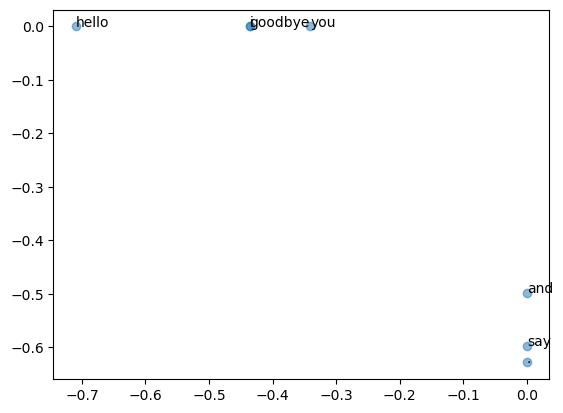

In [23]:
# 2차원 벡터로 표현한 후 그래프로 그리기

for word, word_id in word_to_id.items() :
    plt.annotate(word, (U[word_id, 0], U[word_id,1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

## 2.4.4 PTB 데이터 셋

### 각 문장을 연결한 "하나의 큰 시계열 데이터"로 간주 가능

In [24]:
from dataset import ptb

In [25]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

In [26]:
print('말뭉치 크기: ', len(corpus))
print('corpus[:30]: ', corpus[:30])
print()
print('id_to_word[0]: ', id_to_word[0])
print('id_to_word[1]: ', id_to_word[1])
print('id_to_word[2]: ', id_to_word[2])
print()
print('word_to_id["car"]: ', word_to_id["car"])
print('word_to_id["i"]: ', word_to_id["i"])
print('word_to_id["luck"]: ', word_to_id["luck"])

말뭉치 크기:  929589
corpus[:30]:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]:  aer
id_to_word[1]:  banknote
id_to_word[2]:  berlitz

word_to_id["car"]:  3856
word_to_id["i"]:  1040
word_to_id["luck"]:  3863


## 2.4.5 PTB 데이터셋 평가

In [27]:
from sklearn.utils.extmath import randomized_svd

In [31]:
window_size = 2
wordvec_size = 100

corpus, word_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print("동시발생 수 계산 ...")
C = create_co_matrix(corpus, vocab_size, window_size)
print("PPMI 계산 ...")
W = ppmi(C, verbose = True)

print('SVD 계산 ...')
U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter = 5, random_state=None)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'love', 'hate', 'samsung']
for query in querys :
    most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)


동시발생 수 계산 ...
PPMI 계산 ...


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26720\2717765349.py:12: RuntimeWarning: overflow encountered in scalar multiply
  pmi = np.log2((C[i,j] * N) / (S[i] * S[j]) + eps)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26720\2717765349.py:12: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2((C[i,j] * N) / (S[i] * S[j]) + eps)


1% 완료
2% 완료
3% 완료
4% 완료
5% 완료
6% 완료
7% 완료
8% 완료
9% 완료
10% 완료
11% 완료
12% 완료
13% 완료
14% 완료
15% 완료
16% 완료
17% 완료
18% 완료
19% 완료
20% 완료
21% 완료
22% 완료
23% 완료
24% 완료
25% 완료
26% 완료
27% 완료
28% 완료
29% 완료
30% 완료
31% 완료
32% 완료
33% 완료
34% 완료
35% 완료
36% 완료
37% 완료
38% 완료
39% 완료
40% 완료
41% 완료
42% 완료
43% 완료
44% 완료
45% 완료
46% 완료
47% 완료
48% 완료
49% 완료
50% 완료
51% 완료
52% 완료
53% 완료
54% 완료
55% 완료
56% 완료
57% 완료
58% 완료
59% 완료
60% 완료
61% 완료
62% 완료
63% 완료
64% 완료
65% 완료
66% 완료
67% 완료
68% 완료
69% 완료
70% 완료
71% 완료
72% 완료
73% 완료
74% 완료
75% 완료
76% 완료
77% 완료
78% 완료
79% 완료
80% 완료
81% 완료
82% 완료
83% 완료
84% 완료
85% 완료
86% 완료
87% 완료
88% 완료
89% 완료
90% 완료
91% 완료
92% 완료
93% 완료
94% 완료
95% 완료
96% 완료
97% 완료
98% 완료
99% 완료
100% 완료
SVD 계산 ...

[query] you
i: 0.738332986831665
we: 0.6491184830665588
do: 0.5535686016082764
anybody: 0.5304591655731201
'll: 0.4878748059272766

[query] love
ask: 0.5509049892425537
want: 0.46994706988334656
tune: 0.4666041433811188
trusted: 0.44466346502304077
happens: 0.43366801738739014

[query] hate
home